In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import joblib

In [83]:
filename = '../datasets/dynamic_api_call_sequence_per_malware_100_0_306.csv'

In [84]:
data = pd.read_csv(filename, header=None)

<ipython-input-84-d985b2af7af2>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, header=None)


In [85]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
1,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
2,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
3,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
4,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1


In [86]:
dataset = data.iloc[1:, 1:101]

In [87]:
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
1,112,274,158,215,274,158,215,298,76,208,...,117,71,297,135,171,215,35,208,56,71
2,82,208,187,208,172,117,172,117,172,117,...,60,81,240,117,71,297,135,171,215,35
3,16,110,240,117,240,117,240,117,240,117,...,123,65,112,123,65,112,123,65,113,112
4,82,208,187,208,172,117,172,117,172,117,...,215,208,302,208,302,187,208,302,228,302
5,82,240,117,240,117,240,117,240,117,172,...,40,209,260,40,209,260,141,260,141,260


In [88]:
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
1,112,274,158,215,274,158,215,298,76,208,...,117,71,297,135,171,215,35,208,56,71
2,82,208,187,208,172,117,172,117,172,117,...,60,81,240,117,71,297,135,171,215,35
3,16,110,240,117,240,117,240,117,240,117,...,123,65,112,123,65,112,123,65,113,112
4,82,208,187,208,172,117,172,117,172,117,...,215,208,302,208,302,187,208,302,228,302
5,82,240,117,240,117,240,117,240,117,172,...,40,209,260,40,209,260,141,260,141,260


In [89]:
labels = data.iloc[1:, 101]
labels = labels.to_frame()

In [90]:
labels.head()

,101
1,1
2,1
3,1
4,1
5,1


# Prétraitement des données

In [91]:
# Conversion des données d'entrée en format numérique
dataset = dataset.astype(int)

# Conversion des étiquettes en format numérique
labels = labels.astype(int)

# Division des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=42)

# Normalisation des données
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Feature selection

In [92]:
from sklearn.feature_selection import SelectKBest, chi2

# Nombre de caractéristiques à sélectionner
k = 50

# Sélection des caractéristiques les plus importantes
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

# Création du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Évaluation des performances du modèle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


<ipython-input-93-dcc1f524a7bc>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled, y_train)


Accuracy: 0.9887192342752963
Precision: 0.9894590524730684
Recall: 0.9990643274853801
F1 Score: 0.9942384915323285


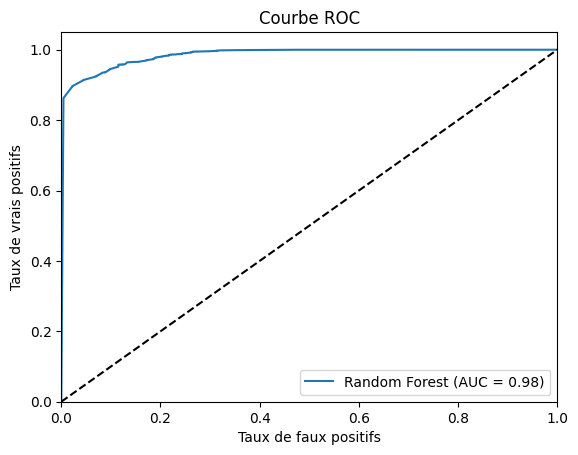

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcul des probabilités de prédiction pour les courbes ROC
y_pred_probs = model.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_pred_probs)

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.figure()
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

In [95]:
# Prédictions sur les données de test
y_pred_probs = model.predict(X_test_scaled)

# Création d'un DataFrame pour les probabilités de prédiction
df_probs = pd.DataFrame(y_pred_probs, columns=model.classes_)

# Ajout de la colonne de classe réelle
df_probs['class'] = y_test.values

# Tracé de l'histogramme pour chaque classe
bins = 10  # Nombre de bins de l'histogramme

plt.figure(figsize=(16, 8))
for i, class_name in enumerate(model.classes_):
    df_aux = df_probs[['class', class_name]]
    ax = plt.subplot(2, 4, i+1)
    sns.histplot(x=class_name, data=df_aux, hue='class', color='b', ax=ax, bins=bins)
    ax.set_title(class_name)
    ax.legend([f"Class: {class_name}", "Rest"])
    ax.set_xlabel(f"P(x = {class_name})")

plt.tight_layout()
plt.show()


ValueError: ignored

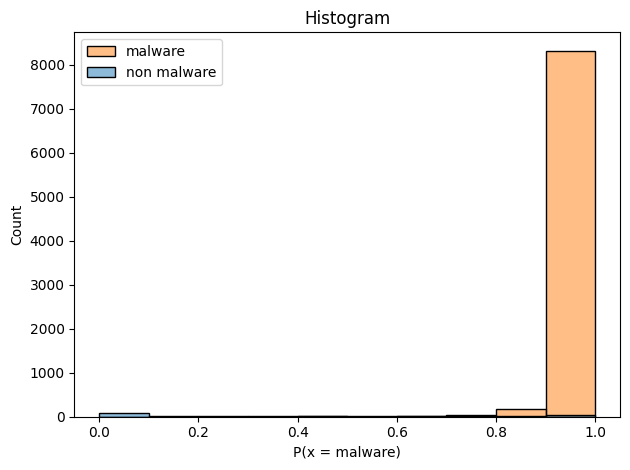

In [96]:
y_score = model.predict_proba(X_test_scaled)

df_aux = pd.DataFrame(columns=['class', 'prob'])
df_aux['class'] = y_test

df_aux['prob'] = y_score[:, i]
df_aux = df_aux.reset_index(drop = True)

ax = plt.subplot(1, 1, 1)

# Plots the probability distribution for the class and the rest
#ax = plt.subplot(2, 4, i-3)
sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
ax.set_title("Histogram")
ax.legend([f"malware", "non malware"])
ax.set_xlabel(f"P(x = malware)")

plt.tight_layout()
plt.show()

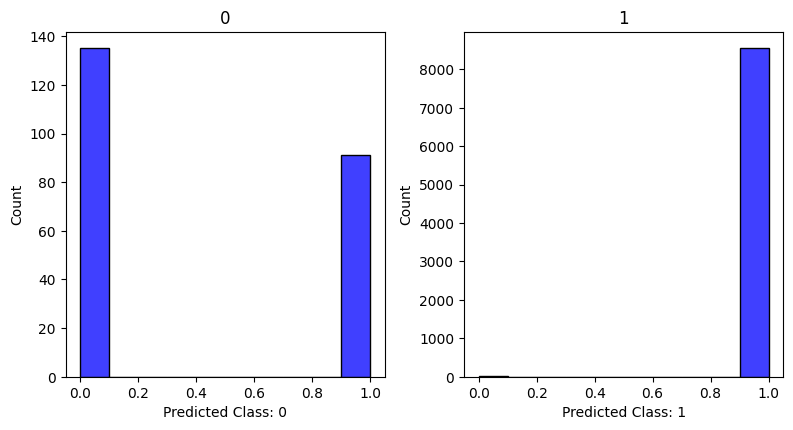

In [97]:
# Obtention des étiquettes uniques à partir des données d'entraînement
classes = np.unique(y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test_scaled)

# Création d'un DataFrame pour les prédictions de classe
df_probs = pd.DataFrame(y_pred, columns=['predicted_class'])

# Ajout de la colonne de classe réelle
df_probs['true_class'] = y_test.values

# Tracé de l'histogramme pour chaque classe
bins = 10  # Nombre de bins de l'histogramme

plt.figure(figsize=(16, 8))
for i, class_name in enumerate(classes):
    df_aux = df_probs[df_probs['true_class'] == class_name]['predicted_class']
    ax = plt.subplot(2, 4, i+1)
    sns.histplot(df_aux, color='b', ax=ax, bins=bins)
    ax.set_title(class_name)
    ax.set_xlabel(f"Predicted Class: {class_name}")

plt.tight_layout()
plt.show()

In [ ]:
import random

# Sélection d'un index au hasard dans l'ensemble de test
random_index = random.randint(0, len(X_test_scaled) - 1)

# Sélection d'un exemple à prédire
example = X_test_scaled[random_index]
true_label = y_test.iloc[random_index]

# Prédiction sur l'exemple
predicted_label = model.predict([example])

print("Exemple de test :", example)
print("Vraie étiquette :", true_label)
print("Étiquette prédite :", predicted_label)


In [99]:
from sklearn.metrics import classification_report

In [100]:
import joblib

# Save the trained Random Forest model
joblib.dump(model, "RM_.pkl")

['RM_.pkl']

In [101]:
import pickle

# Save the trained Random Forest model
with open("./RM.pkl", "wb") as file:
    pickle.dump(model, file)


In [102]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.94406   0.59735   0.73171       226
           1    0.98946   0.99906   0.99424      8550

    accuracy                        0.98872      8776
   macro avg    0.96676   0.79820   0.86297      8776
weighted avg    0.98829   0.98872   0.98748      8776



# SVM

In [103]:
from sklearn.svm import SVC

# Création du modèle SVM
svm_model = SVC(random_state=42)

# Entraînement du modèle SVM
svm_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
svm_y_pred = svm_model.predict(X_test_scaled)

# Évaluation des performances du modèle SVM
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)

print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.9862123974475843
SVM Precision: 0.986045438819052
SVM Recall: 1.0
SVM F1 Score: 0.9929736949073805


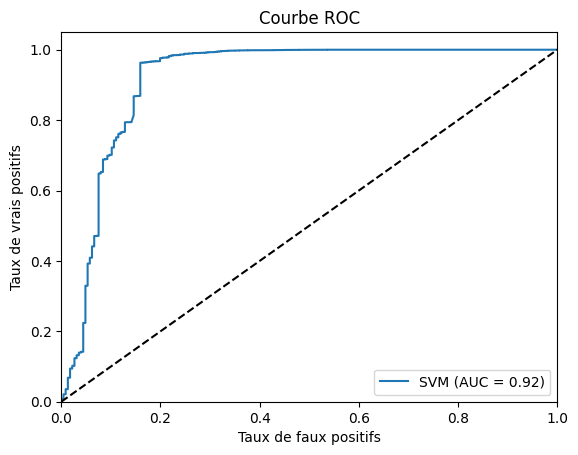

In [104]:
# Calcul des probabilités de prédiction pour les courbes ROC
svm_y_pred_probs = svm_model.decision_function(X_test_scaled)
svm_auc = roc_auc_score(y_test, svm_y_pred_probs)

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, svm_y_pred_probs)

plt.figure()
plt.plot(fpr, tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

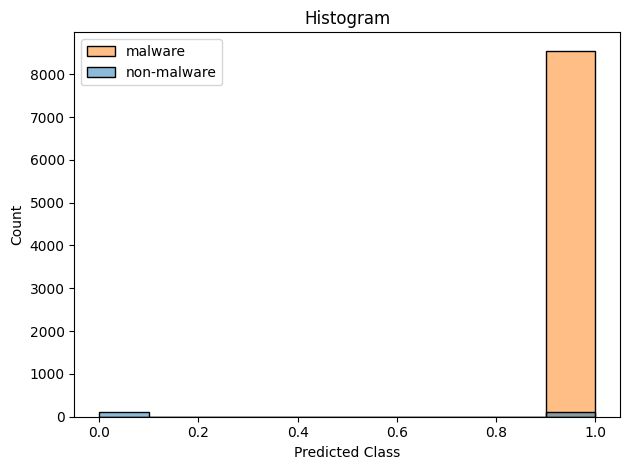

In [109]:
y_pred = svm_model.predict(X_test_scaled)

df_aux = pd.DataFrame(columns=['class'])
df_aux['class'] = y_test

df_aux['predicted_class'] = y_pred
df_aux = df_aux.reset_index(drop=True)

ax = plt.subplot(1, 1, 1)
sns.histplot(x="predicted_class", data=df_aux, hue='class', color='b', ax=ax, bins=bins)
ax.set_title("Histogram")
ax.legend(["malware", "non-malware"])
ax.set_xlabel("Predicted Class")

plt.tight_layout()
plt.show()


In [110]:
import joblib

# Save the trained SVM model
joblib.dump(svm_model, "svm.pkl")

['svm.pkl']

In [111]:
print(classification_report(y_test, svm_y_pred, digits=5))

              precision    recall  f1-score   support

           0    1.00000   0.46460   0.63444       226
           1    0.98605   1.00000   0.99297      8550

    accuracy                        0.98621      8776
   macro avg    0.99302   0.73230   0.81371      8776
weighted avg    0.98640   0.98621   0.98374      8776



# AdaBoost

In [112]:
from sklearn.ensemble import AdaBoostClassifier

# Création du modèle AdaBoost
adaboost_model = AdaBoostClassifier(random_state=42)

# Entraînement du modèle AdaBoost
adaboost_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
adaboost_y_pred = adaboost_model.predict(X_test_scaled)

# Évaluation des performances du modèle AdaBoost
adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
adaboost_precision = precision_score(y_test, adaboost_y_pred)
adaboost_recall = recall_score(y_test, adaboost_y_pred)
adaboost_f1 = f1_score(y_test, adaboost_y_pred)

print("AdaBoost Accuracy:", adaboost_accuracy)
print("AdaBoost Precision:", adaboost_precision)
print("AdaBoost Recall:", adaboost_recall)
print("AdaBoost F1 Score:", adaboost_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Accuracy: 0.9832497721057429
AdaBoost Precision: 0.9857787027402012
AdaBoost Recall: 0.9971929824561403
AdaBoost F1 Score: 0.9914529914529914


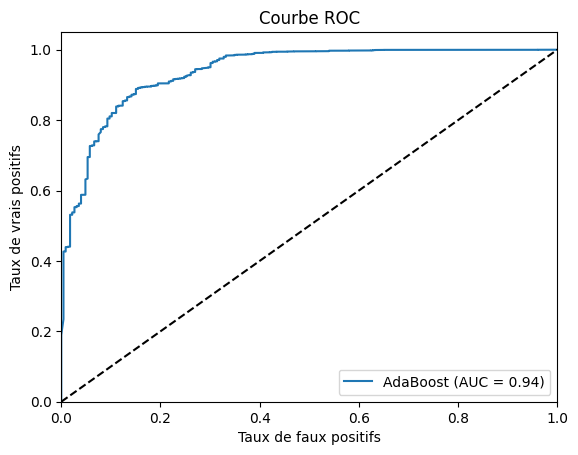

In [113]:
# Calcul des probabilités de prédiction pour les courbes ROC
adaboost_y_pred_probs = adaboost_model.decision_function(X_test_scaled)
adaboost_auc = roc_auc_score(y_test, adaboost_y_pred_probs)

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, adaboost_y_pred_probs)

plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (AUC = {:.2f})'.format(adaboost_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


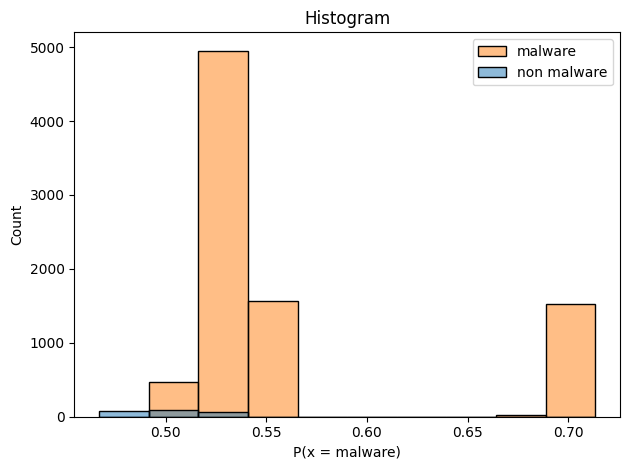

In [114]:
y_score = adaboost_model.predict_proba(X_test_scaled)

df_aux = pd.DataFrame(columns=['class', 'prob'])
df_aux['class'] = y_test

df_aux['prob'] = y_score[:, i]
df_aux = df_aux.reset_index(drop = True)

ax = plt.subplot(1, 1, 1)

# Plots the probability distribution for the class and the rest
#ax = plt.subplot(2, 4, i-3)
sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
ax.set_title("Histogram")
ax.legend([f"malware", "non malware"])
ax.set_xlabel(f"P(x = malware)")

plt.tight_layout()
plt.show()

In [115]:
import joblib

# Save the trained AdaBoost model
joblib.dump(adaboost_model, "AdaBoost.pkl")

['AdaBoost.pkl']

In [116]:
print(classification_report(y_test, adaboost_y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.81102   0.45575   0.58357       226
           1    0.98578   0.99719   0.99145      8550

    accuracy                        0.98325      8776
   macro avg    0.89840   0.72647   0.78751      8776
weighted avg    0.98128   0.98325   0.98095      8776



# XGBoost

In [117]:
import xgboost as xgb

# Création du modèle XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Entraînement du modèle XGBoost
xgb_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
xgb_y_pred = xgb_model.predict(X_test_scaled)

# Évaluation des performances du modèle XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall:", xgb_recall)
print("XGBoost F1 Score:", xgb_f1)

XGBoost Accuracy: 0.9900865998176845
XGBoost Precision: 0.9904949576909702
XGBoost Recall: 0.9994152046783625
XGBoost F1 Score: 0.9949350876171624


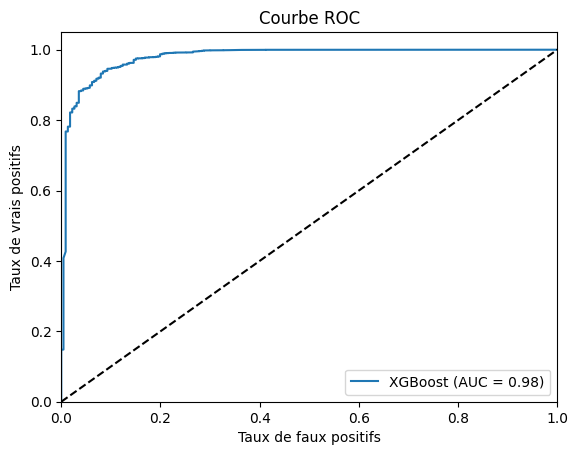

In [118]:
# Calcul des probabilités de prédiction pour les courbes ROC
xgb_y_pred_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_y_pred_probs)

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, xgb_y_pred_probs)

plt.figure()
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(xgb_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

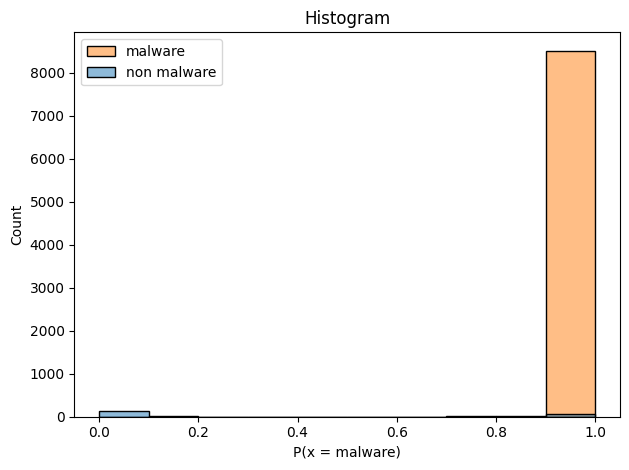

In [119]:
y_score = xgb_model.predict_proba(X_test_scaled)

df_aux = pd.DataFrame(columns=['class', 'prob'])
df_aux['class'] = y_test

df_aux['prob'] = y_score[:, i]
df_aux = df_aux.reset_index(drop = True)

ax = plt.subplot(1, 1, 1)

# Plots the probability distribution for the class and the rest
#ax = plt.subplot(2, 4, i-3)
sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
ax.set_title("Histogram")
ax.legend([f"malware", "non malware"])
ax.set_xlabel(f"P(x = malware)")

plt.tight_layout()
plt.show()

In [120]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_model, "XGBoost.pkl")

['XGBoost.pkl']

In [121]:
print(classification_report(y_test, xgb_y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.96644   0.63717   0.76800       226
           1    0.99049   0.99942   0.99494      8550

    accuracy                        0.99009      8776
   macro avg    0.97847   0.81829   0.88147      8776
weighted avg    0.98988   0.99009   0.98909      8776



# MLPC

In [122]:
from sklearn.neural_network import MLPClassifier

# Création du modèle MLPC
mlpc_model = MLPClassifier(random_state=42)

# Entraînement du modèle MLPC
mlpc_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test
mlpc_y_pred = mlpc_model.predict(X_test_scaled)

# Évaluation des performances du modèle MLPC
mlpc_accuracy = accuracy_score(y_test, mlpc_y_pred)
mlpc_precision = precision_score(y_test, mlpc_y_pred)
mlpc_recall = recall_score(y_test, mlpc_y_pred)
mlpc_f1 = f1_score(y_test, mlpc_y_pred)

print("MLPC Accuracy:", mlpc_accuracy)
print("MLPC Precision:", mlpc_precision)
print("MLPC Recall:", mlpc_recall)
print("MLPC F1 Score:", mlpc_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPC Accuracy: 0.9867821330902461
MLPC Precision: 0.9880787037037037
MLPC Recall: 0.9984795321637427
MLPC F1 Score: 0.9932518906340895


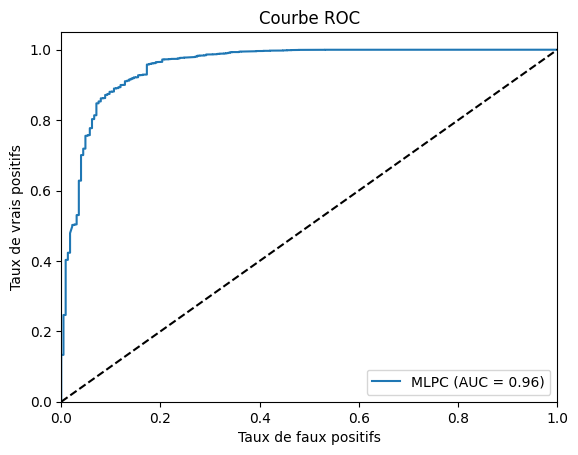

In [123]:
# Calcul des probabilités de prédiction pour les courbes ROC
mlpc_y_pred_probs = mlpc_model.predict_proba(X_test_scaled)[:, 1]
mlpc_auc = roc_auc_score(y_test, mlpc_y_pred_probs)

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, mlpc_y_pred_probs)

plt.figure()
plt.plot(fpr, tpr, label='MLPC (AUC = {:.2f})'.format(mlpc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

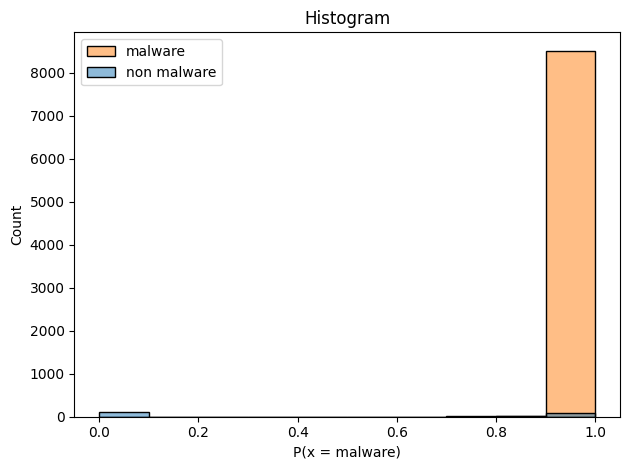

In [124]:
y_score = mlpc_model.predict_proba(X_test_scaled)

df_aux = pd.DataFrame(columns=['class', 'prob'])
df_aux['class'] = y_test

df_aux['prob'] = y_score[:, i]
df_aux = df_aux.reset_index(drop = True)

ax = plt.subplot(1, 1, 1)

# Plots the probability distribution for the class and the rest
#ax = plt.subplot(2, 4, i-3)
sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
ax.set_title("Histogram")
ax.legend([f"malware", "non malware"])
ax.set_xlabel(f"P(x = malware)")

plt.tight_layout()
plt.show()

In [125]:
import joblib

# Save the trained MLPC model
joblib.dump(mlpc_model, "MLPC.pkl")

['MLPC.pkl']

In [126]:
print(classification_report(y_test, mlpc_y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.90441   0.54425   0.67956       226
           1    0.98808   0.99848   0.99325      8550

    accuracy                        0.98678      8776
   macro avg    0.94625   0.77136   0.83640      8776
weighted avg    0.98592   0.98678   0.98517      8776



# DL

In [129]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Création du modèle
model = Sequential()

# Ajout des couches cachées
model.add(Dense(128, activation='relu', input_shape=(100,)))  # Couche d'entrée
model.add(Dropout(0.2))  # Couche Dropout pour la régularisation
model.add(Dense(64, activation='relu'))  # Couche cachée
model.add(Dropout(0.2))  # Couche Dropout
model.add(Dense(32, activation='relu'))  # Couche cachée

# Ajout de la couche de sortie
model.add(Dense(1, activation='sigmoid'))  # Couche de sortie avec une activation sigmoid pour la classification binaire

# Compilation du modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Définition de l'arrêt précoce
early_stopping = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)

# Entraînement du modèle
history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=10, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Évaluation des performances du modèle
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/10
1097/1097 [==============================] - 8s 5ms/step - loss: 0.0965 - accuracy: 0.9783 - val_loss: 0.0794 - val_accuracy: 0.9814
Epoch 2/10
1097/1097 [==============================] - 4s 4ms/step - loss: 0.0720 - accuracy: 0.9825 - val_loss: 0.0709 - val_accuracy: 0.9815
Epoch 3/10
1097/1097 [==============================] - 4s 4ms/step - loss: 0.0671 - accuracy: 0.9830 - val_loss: 0.0660 - val_accuracy: 0.9834
Epoch 4/10
1097/1097 [==============================] - 5s 5ms/step - loss: 0.0645 - accuracy: 0.9837 - val_loss: 0.0644 - val_accuracy: 0.9834
Epoch 5/10
1097/1097 [==============================] - 4s 4ms/step - loss: 0.0608 - accuracy: 0.9841 - val_loss: 0.0704 - val_accuracy: 0.9840
Epoch 6/10
1097/1097 [==============================] - 4s 4ms/step - loss: 0.0579 - accuracy: 0.9848 - val_loss: 0.0600 - val_accuracy: 0.9846
Epoch 7/10
1097/1097 [==============================] - 4s 4ms/step - loss: 0.0560 - accuracy: 0.9850 - val_loss: 0.0582 - val_accuracy:

In [127]:
# Prédictions sur les données de test
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

# Rapport de classification
report = classification_report(y_test, y_pred, digits=5)
print(report)

              precision    recall  f1-score   support

           0    0.94406   0.59735   0.73171       226
           1    0.98946   0.99906   0.99424      8550

    accuracy                        0.98872      8776
   macro avg    0.96676   0.79820   0.86297      8776
weighted avg    0.98829   0.98872   0.98748      8776



In [131]:
y_score = model.predict(X_test_scaled)

df_aux = pd.DataFrame(columns=['class', 'prob'])
df_aux['class'] = y_test

df_aux['prob'] = y_score[:, i]
df_aux = df_aux.reset_index(drop = True)

ax = plt.subplot(1, 1, 1)

# Plots the probability distribution for the class and the rest
#ax = plt.subplot(2, 4, i-3)
sns.histplot(x = "prob", data = df_aux, hue = 'class', color='b', ax = ax, bins = bins)
ax.set_title("Histogram")
ax.legend([f"malware", "non malware"])
ax.set_xlabel(f"P(x = malware)")

plt.tight_layout()
plt.show()

275/275 [==============================] - 1s 2ms/step


IndexError: ignored

275/275 [==============================] - 0s 2ms/step


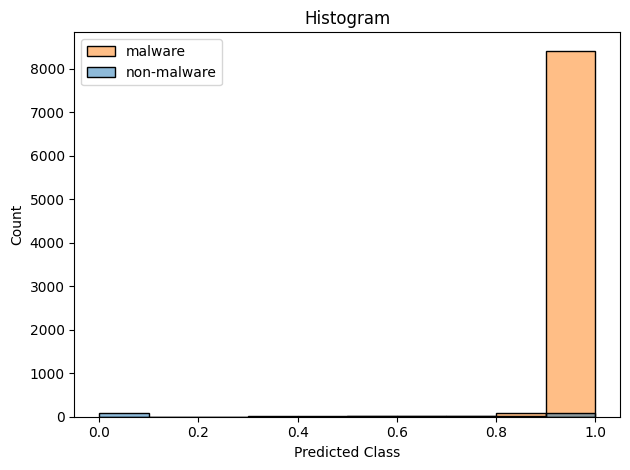

In [132]:
y_pred = model.predict(X_test_scaled)

df_aux = pd.DataFrame(columns=['class'])
df_aux['class'] = y_test

df_aux['predicted_class'] = y_pred
df_aux = df_aux.reset_index(drop=True)

ax = plt.subplot(1, 1, 1)
sns.histplot(x="predicted_class", data=df_aux, hue='class', color='b', ax=ax, bins=bins)
ax.set_title("Histogram")
ax.legend(["malware", "non-malware"])
ax.set_xlabel("Predicted Class")

plt.tight_layout()
plt.show()


275/275 [==============================] - 1s 3ms/step


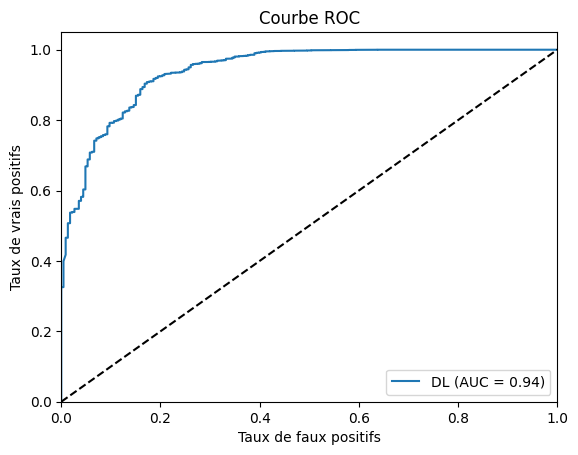

In [135]:
# Calcul des probabilités de prédiction pour les courbes ROC
mlpc_y_pred_probs = model.predict(X_test_scaled)
mlpc_auc = roc_auc_score(y_test, mlpc_y_pred_probs)

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, mlpc_y_pred_probs)

plt.figure()
plt.plot(fpr, tpr, label='DL (AUC = {:.2f})'.format(mlpc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Save the trained model
model.save("dl.h5")

In [ ]:
dataset = data.iloc[1, 1:101].to_frame().transpose()
dataset.to_csv('./test_kaggle.csv', index=False)

In [ ]:
print(classification_report(y_test, mlpc_y_pred, digits=5))